In [63]:
"""
The only difference here is that the entire dataset is used. This makes the model execution much slower, but it also nearly doubles the accuracy of the model
"""

'\nThe only difference here is that the entire dataset is used. This makes the model execution much slower, but it also nearly doubles the accuracy of the model\n'

In [64]:
"""
Run once ever

Downloads and extracts the dataset
"""


# import urllib.request
# import tarfile
# import os

# mp3file = urllib.request.urlopen("https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz")
# with open('tmp','wb') as output:
#   output.write(mp3file.read())

# file = tarfile.open("tmp")
# file.extractall(".")
# file.close()
# os.remove("tmp")
# os.remove("cifar-100-python/file.txt~")

'\nRun once ever\n\nDownloads and extracts the dataset\n'

In [65]:

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import cv2
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [66]:
#function to read files present in the Python version of the dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [67]:
trainData = unpickle('./cifar-100-python/train')
#type of items in each file
for item in trainData:
    print(item, type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [68]:
testData = unpickle('./cifar-100-python//test')
metaData = unpickle('./cifar-100-python//meta')
#metaData
print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [69]:
#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])
print(subCategory)

         SubClass
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]


In [70]:
# I'm pretty sure this is set up so that dimension 0 is the category
X_train = trainData['data']
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)

In [71]:
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
#X_test

Image number selected : 7086
Shape of image : (32, 32, 3)
Image subcategory number: 70
Image subcategory name: Rose


/tmp/ipykernel_94962/2356857472.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))


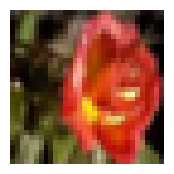

In [72]:
#generating a random number to display a random image from the dataset along with the label's number and name
#setting the figure size
rcParams['figure.figsize'] = 2,2
#generating a random number
imageId = np.random.randint(0, len(X_train))
#showing the image at that id
plt.imshow(X_train[imageId])
#setting display off for the image
plt.axis('off')
#displaying the image id
print("Image number selected : {}".format(imageId))
#displaying the shape of the image
print("Shape of image : {}".format(X_train[imageId].shape))

#displaying the subcategory number
print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
#displaying the subcategory name
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

In [73]:
winSize = (32,32)
blockSize = (8,8)
blockStride = (4,4)
# cellSize = (4,4) # original size from Hany
cellSize = (2,2)
# nbins = 9 * original number from Hany
nbins = 12


df = []

**Create Database of HOGs** 
(Pandas dataframe)

In [74]:
# this is essentially where we fit the model
for i in range(len(X_train)):
    image = cv2.cvtColor(X_train[i],cv2.COLOR_BGR2GRAY) # convert the colorspace to grayscale
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
    df.append(hog.compute(image))
    
# DF = pd.DataFrame(df)
DF = np.array(df)


In [75]:
DF

array([[0.        , 0.        , 0.00412205, ..., 0.00682359, 0.0028279 ,
        0.06439196],
       [0.00403736, 0.        , 0.        , ..., 0.        , 0.        ,
        0.06546165],
       [0.03661579, 0.02598861, 0.01377351, ..., 0.        , 0.        ,
        0.01730055],
       ...,
       [0.00189616, 0.01049946, 0.02753996, ..., 0.00927464, 0.        ,
        0.01424231],
       [0.00415612, 0.        , 0.        , ..., 0.0133536 , 0.        ,
        0.01345766],
       [0.01931535, 0.02127834, 0.00791567, ..., 0.        , 0.        ,
        0.01045431]], dtype=float32)

****continue work checkpoint: standardize test data and proceed****

In [76]:
def predict(img, k, DF):
    
    #Extract sample's features
    
    sample = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
    _hog = hog.compute(sample)
    
    #Get Nearest Neighbors
    distances = []
    for i in range(len(DF)):
        distances.append(np.linalg.norm(_hog - DF[i]))         # 1- Calculate and store each datapoint's Euclidean distance
        
    kNNsID = np.argsort(distances)[:k]                              # 2- Sort distances' IDs in an ascending order
    
    kNNsCats = []
    for i in kNNsID:
        kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs
    
    CommonCat = Counter(kNNsCats).most_common(1)                    # 4- Count and get Most common category
    
    return CommonCat

In [77]:
n = 25
p = predict(X_test[n], 20, DF)

/tmp/ipykernel_94962/2030058828.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs


In [78]:
def getAccuracy(k, x_test, labels, x_train):
    RightCount = 0
    preds = []
    df = []
    for i in range(len(x_train)):
        image = cv2.cvtColor(x_train[i],cv2.COLOR_BGR2GRAY) # convert the colorspace to grayscale
        hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
        df.append(hog.compute(image))
    df = np.array(df)
    for i in range(len(x_test)):
    # for i in range(1000):
        #print("1")
        pred = predict(x_test[i], k, df)
        #print("2")
        if pred[0][0] == subCategory.iloc[labels[i]][0].capitalize():
            #print("3")
            RightCount += 1
            #print("4")
        print("Done: {}, Accuracy: {}".format(i, (RightCount / (i + 1)) * 100))
        preds.append(pred)
    # return preds
    return (RightCount / (i + 1)) * 100

In [79]:
# Preds14 = getAccuracy(10, X_test, testData, DF) # took 45 minutes to run on my laptop 
# IF YOU USE A DATAFRAME FOR DF as Hany orginally did:
# would take ~8 hours to test on the entire test set
# It's only single threaded, so I want to multi thread it so that its not so *slow*
# accuracy on first 1000 test images is 20.979%

# if you use an array for DF, then it only takes ~40 minutes for the entire test set



from sklearn.model_selection import KFold

accuracies = []
labels = np.array(trainData["fine_labels"])

kf = KFold(n_splits=10, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    print(f"{labels[test_index]}")
    accuracies.append(getAccuracy(10, X_train[test_index], labels[test_index], X_train[train_index]))

Fold 0:
  Train: index=[ 5000  5001  5002 ... 49997 49998 49999]
  Test:  index=[   0    1    2 ... 4997 4998 4999]
[19 29  0 ... 48 49 39]


/tmp/ipykernel_94962/2030058828.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs
/tmp/ipykernel_94962/2310552792.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pred[0][0] == subCategory.iloc[labels[i]][0].capitalize():


Done: 0, Accuracy: 0.0
Done: 1, Accuracy: 0.0
Done: 2, Accuracy: 0.0
Done: 3, Accuracy: 0.0
Done: 4, Accuracy: 0.0
Done: 5, Accuracy: 0.0
Done: 6, Accuracy: 0.0
Done: 7, Accuracy: 0.0
Done: 8, Accuracy: 0.0
Done: 9, Accuracy: 0.0
Done: 10, Accuracy: 0.0
Done: 11, Accuracy: 0.0
Done: 12, Accuracy: 0.0
Done: 13, Accuracy: 0.0
Done: 14, Accuracy: 0.0
Done: 15, Accuracy: 0.0
Done: 16, Accuracy: 0.0
Done: 17, Accuracy: 0.0
Done: 18, Accuracy: 0.0
Done: 19, Accuracy: 0.0
Done: 20, Accuracy: 0.0
Done: 21, Accuracy: 0.0
Done: 22, Accuracy: 0.0
Done: 23, Accuracy: 0.0
Done: 24, Accuracy: 0.0
Done: 25, Accuracy: 0.0
Done: 26, Accuracy: 0.0
Done: 27, Accuracy: 0.0
Done: 28, Accuracy: 0.0
Done: 29, Accuracy: 0.0
Done: 30, Accuracy: 0.0
Done: 31, Accuracy: 0.0
Done: 32, Accuracy: 0.0
Done: 33, Accuracy: 0.0
Done: 34, Accuracy: 0.0
Done: 35, Accuracy: 0.0
Done: 36, Accuracy: 0.0
Done: 37, Accuracy: 0.0
Done: 38, Accuracy: 0.0
Done: 39, Accuracy: 0.0
Done: 40, Accuracy: 0.0
Done: 41, Accuracy: 0.0
Do

KeyboardInterrupt: 

In [ ]:
TruePreds = []

for i in range(1000):
    TruePreds.append(subCategory.iloc[testData['fine_labels'][i]][0].capitalize())

/tmp/ipykernel_94962/3796635586.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TruePreds.append(subCategory.iloc[testData['fine_labels'][i]][0].capitalize())


In [ ]:
# Predicted = []
# for i in range(len(Preds14)):
#     Predicted.append(Preds14[i][0][0])

NameError: name 'Preds14' is not defined

In [ ]:
# from sklearn.metrics import *

# print("accuracy:", accuracy_score(TruePreds, Predicted))
# print("f1:", f1_score(TruePreds, Predicted, average="macro"))
# print("recall:", recall_score(TruePreds, Predicted, average="macro"))
# print("precision:", precision_score(TruePreds, Predicted, average="macro"))

accuracy: 0.246
f1: 0.2354551790088536
recall: 0.24422533022533022
precision: 0.2871582444599587


/home/cnie109/Documents/codeStuff/cs325/cs325-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm = confusion_matrix(TruePreds, Predicted)

In [ ]:
x = np.array(TruePreds)
len(np.unique(x))

100

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = np.unique(x), 
                     columns = np.unique(x))

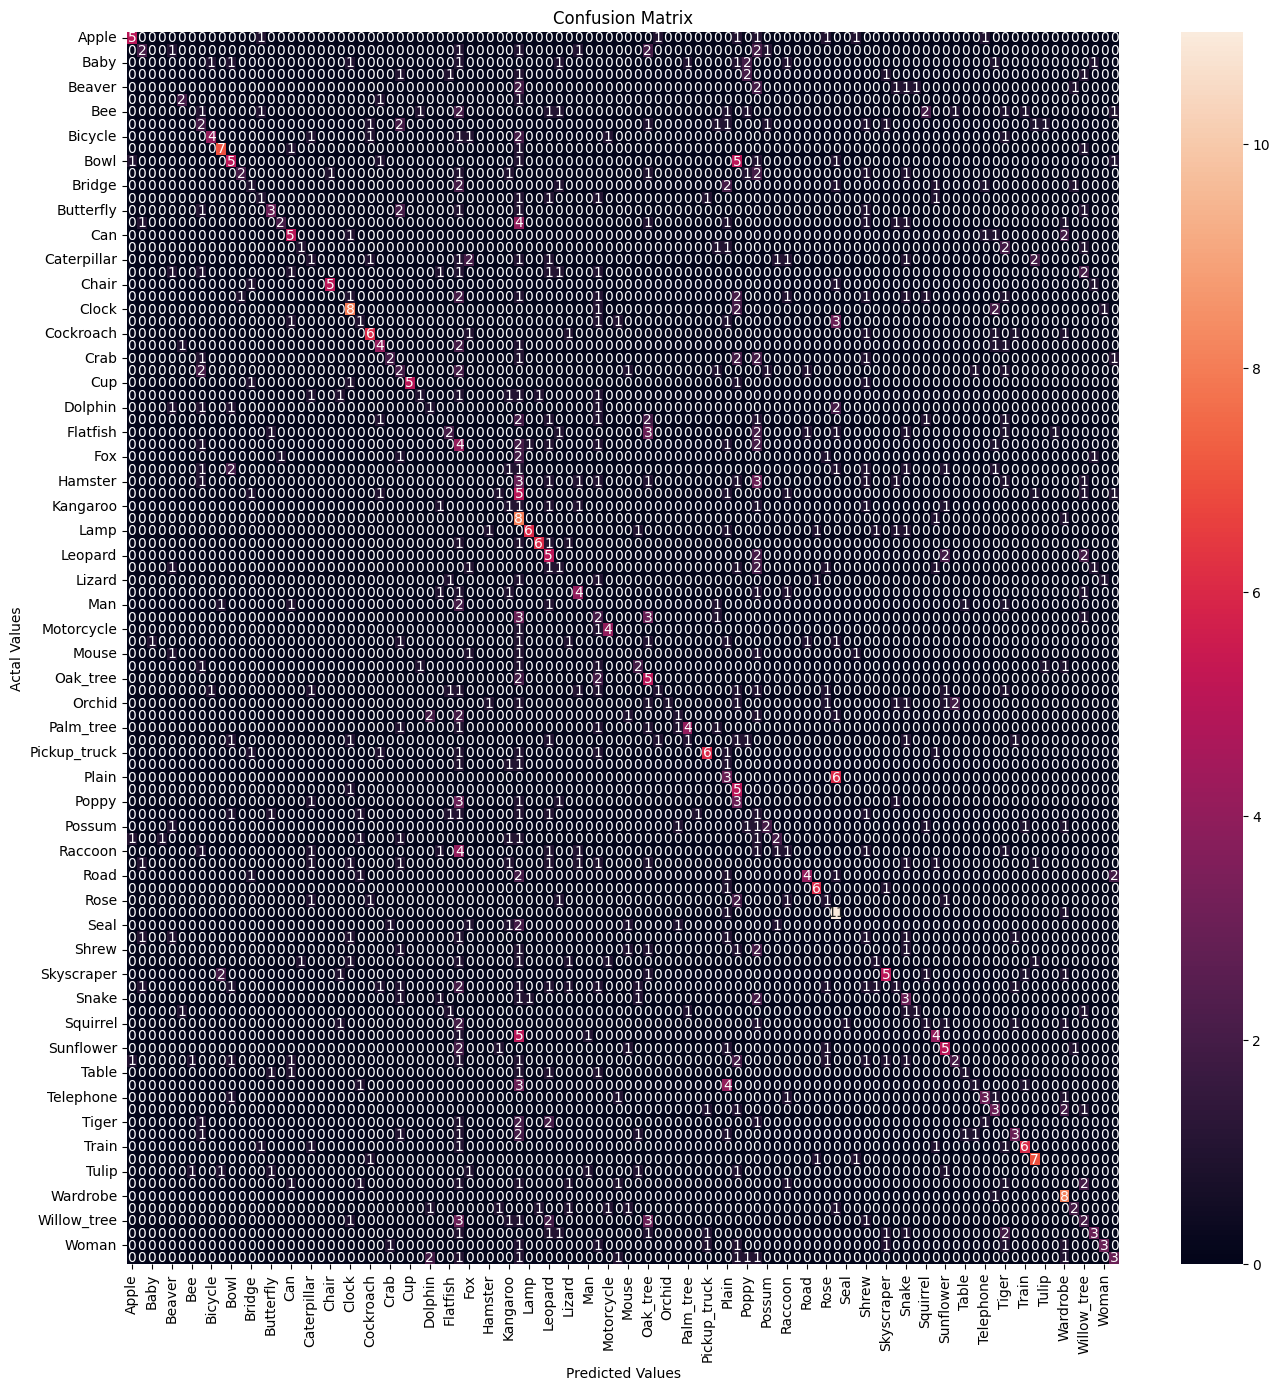

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()